# Chapter 1.
### Next Chapter
In chapter 2 (a closely related notebook see hyperlink) 
I demonstrate optimization using spike time statistics via the allen SDK
[Notebook 2](allen_test_example2.ipynb)


### Get optimization results.

Either preload pre-optimized data for five different experimental cell types, ir in the absence of data, do the optimization in place below.

Set up environment.
In the cell below we set up an environment that supports visualization of 
pre-computed optimization results. This also includes download of the results.

This also includes forcing a notebook compliant plotting backend initialization, resulting in an empty graph, for the time being

In [9]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt
#plt.plot([0],[1])


import sys
import pickle

from neuronunit.optimisation.optimization_management import inject_and_plot, nuunit_dm_evaluation, transform
import os
try:
    import efel
except:
    !pip install efel
from neuronunit.optimisation.get_three_feature_sets_from_nml_db import three_feature_sets_on_static_models


try:
    results = pickle.load(open('../unit_test/working/all_data_tests.p','rb'))
except:
    try:

        os.system('wget https://www.dropbox.com/s/cod7jz4yrr55dsw/all_data_tests.p?dl=0')
        results = pickle.load(open('../unit_test/working/all_data_tests.p?dl=0','rb'))
    except:
        # No data available, so lets generate data in place below:
        # Do the optization in place.
        import elephant_data_tests

        results = pickle.load(open('../unit_test/working/all_data_tests.p','rb'))

### Load in pre-wrangled/refined data
that was output from a previous optimization process.

In [10]:
import os
result_RAW = pickle.load(open('RAWall_data_tests.p','rb'))
result_ADEXP = pickle.load(open('ADEXPall_data_tests.p','rb'))
result_RAW = result_RAW['RAW']

electro_path = str(os.getcwd())+'/../tests/russell_tests.p'

assert os.path.isfile(electro_path) == True
with open(electro_path,'rb') as f:
    (test_frame,obs_frame) = pickle.load(f)
filtered_tests = {key:val for key,val in test_frame.items()}
from neuronunit.optimisation.optimization_management import OptMan,TSD, get_dtc_pop
from neuronunit.optimisation import model_parameters
print('Neuronunit tests used to constrain models {0}'.format(filtered_tests.keys())


dict_keys(['Cerebellum Purkinje cell', 'Olfactory bulb (main) mitral cell', 'Hippocampus CA1 pyramidal cell', 'Neocortex pyramidal cell layer 5-6', 'Hippocampus CA1 basket cell'])


In [11]:
#type(result_ADEXP['ADEXP']['olf'][0])
ad_olf_dtc = result_ADEXP['ADEXP']['olf'][0].dtc
ad_purkine_dtc = result_ADEXP['ADEXP']['purkine'][0].dtc
ad_ca1pyr_dtc = result_ADEXP['ADEXP']['ca1pyr'][0].dtc
ad_ca1basket_dtc = result_ADEXP['ADEXP']['ca1basket'][0].dtc
ad_neo_dtc = result_ADEXP['ADEXP']['neo'][0].dtc

In [12]:
#type(result_ADEXP['ADEXP']['olf'][0])
olf_dtc = result_RAW['olf'][0]
purkine_dtc = result_RAW['purkine'][0]
ca1pyr_dtc = result_RAW['ca1pyr'][0]
ca1basket_dtc = result_RAW['ca1basket'][0]
neo_dtc = result_RAW['neo'][0]


## Explanation of Iterated Plots Below:
For every model pertaining to a different experimental cell show the rheobase spike waveform shape for the best  solution from the two different classes of optimized models.

This is an indirect way of cross checking that optimizer worked, as it exerted the same constraints on different neural models.

Initially you can see that spike onset time was not a feature used to constrain models, therefore the two different model classes vary a lot in spike onset time, however, we were less interested in spike timing, and more interested in waveform shape properties. Therefore in second form of plots (scroll down), one can see that spike onset time has been artificially controlled for in the spike visualization be re-aligning waveforms.

The adpative exponential model has an artificial triangular appearance, only because as model developers we realized we could further optimize the cells experimental agreement, by adding in code hacks to improve the cells spike amplitude.

Without this code hack, waveform shapes look deceptively dissimilar to a human viewer.

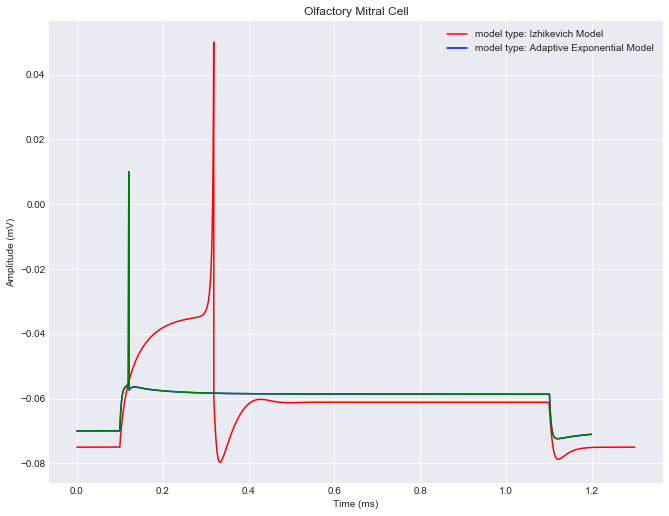

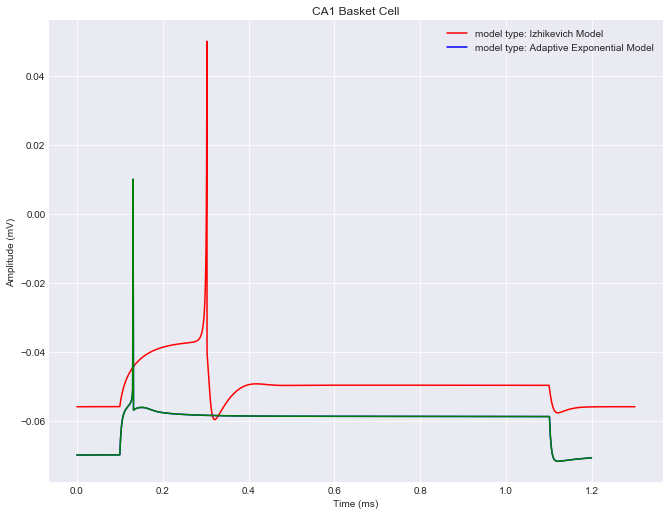

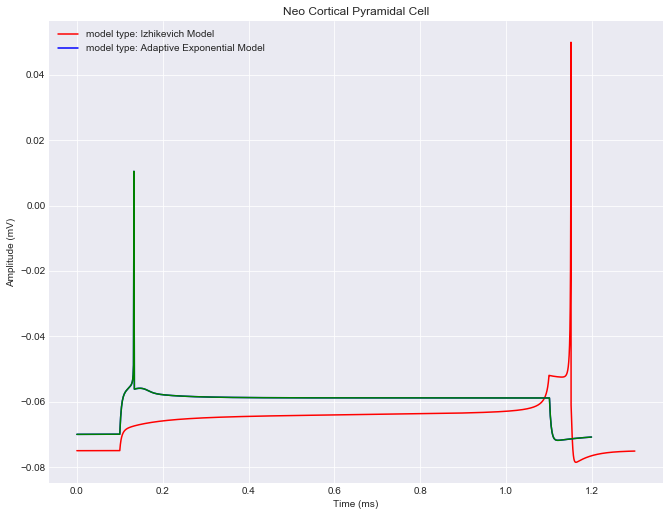

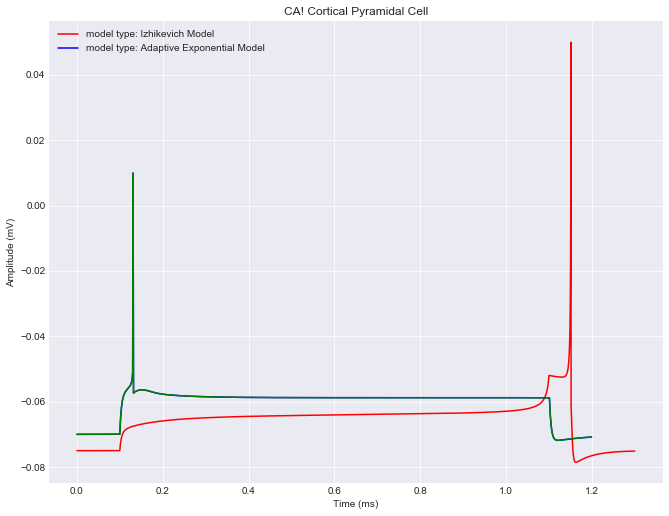

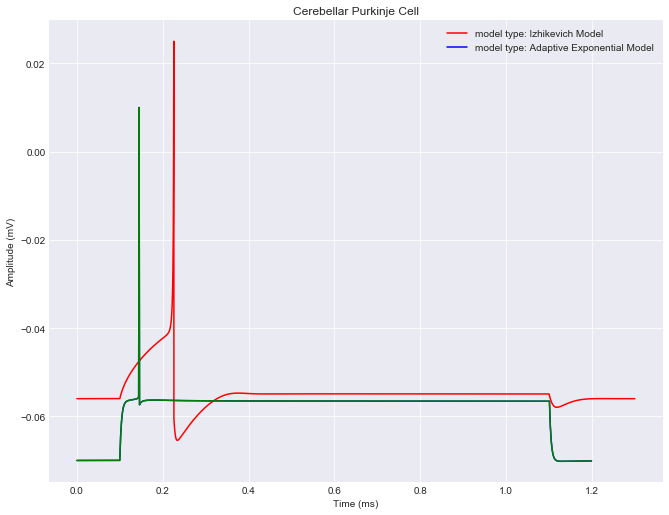

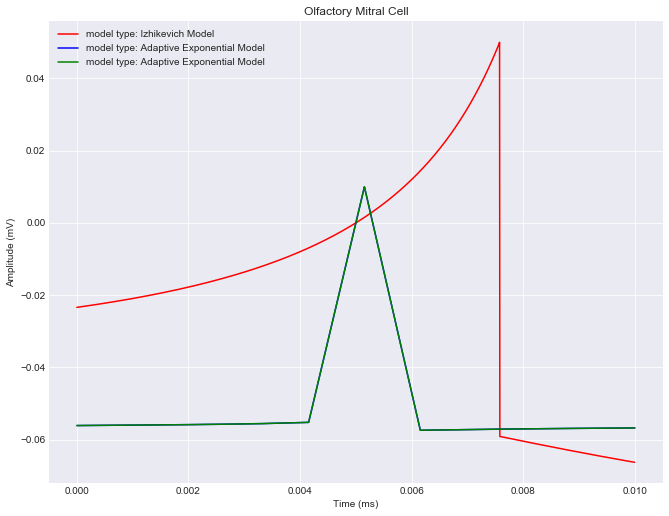

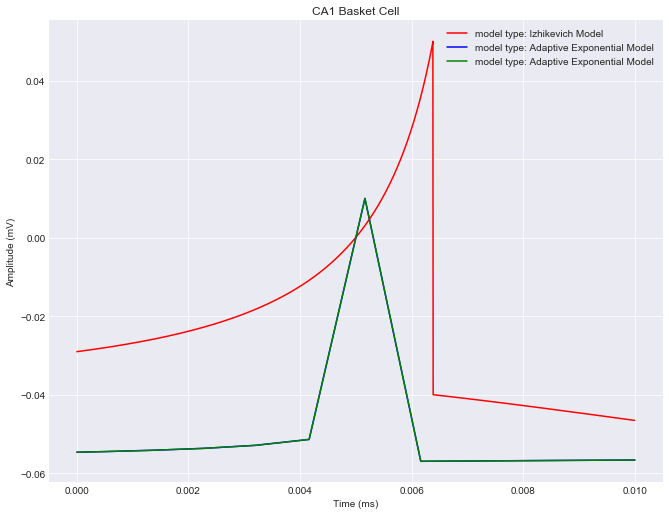

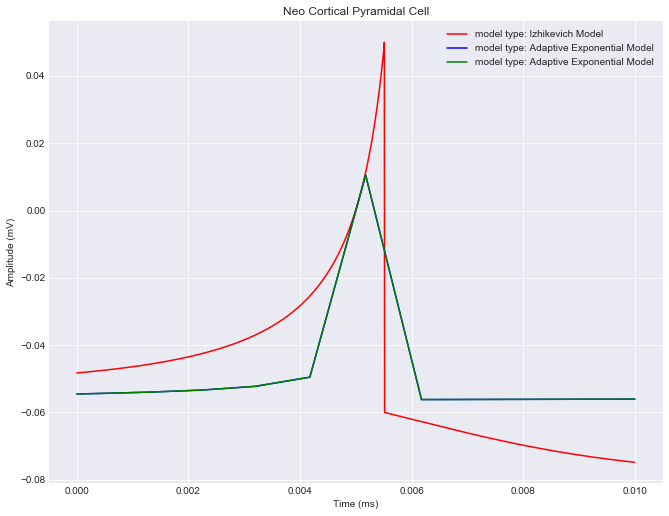

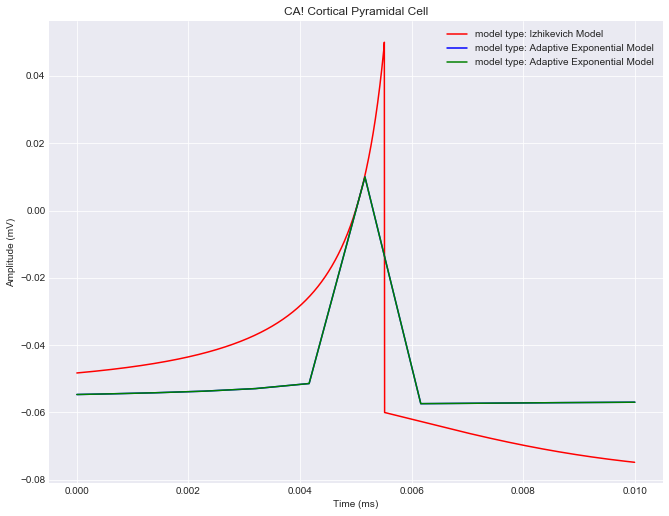

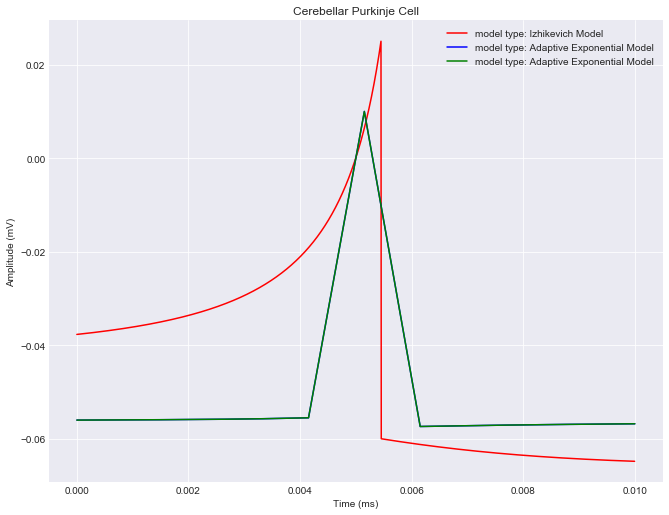

In [13]:

_ = inject_and_plot([olf_dtc],second_pop=[ad_olf_dtc],third_pop=[ad_olf_dtc],snippets=True,experimental_cell_type='Olfactory Mitral Cell')
_ = inject_and_plot([ca1basket_dtc],second_pop=[ad_ca1basket_dtc],third_pop=[ad_ca1basket_dtc],snippets=True,experimental_cell_type='CA1 Basket Cell')
_ = inject_and_plot([neo_dtc],second_pop=[ad_neo_dtc],third_pop=[ad_neo_dtc],snippets=True,experimental_cell_type='Neo Cortical Pyramidal Cell')
_ = inject_and_plot([ca1pyr_dtc],second_pop=[ad_ca1pyr_dtc],third_pop=[ad_ca1pyr_dtc],snippets=True,experimental_cell_type='CA! Cortical Pyramidal Cell')
_ = inject_and_plot([purkine_dtc],second_pop=[ad_purkine_dtc],third_pop=[ad_purkine_dtc],snippets=True,experimental_cell_type='Cerebellar Purkinje Cell')

_ = inject_and_plot([olf_dtc],second_pop=[ad_olf_dtc],third_pop=[ad_olf_dtc],experimental_cell_type='Olfactory Mitral Cell')
_ = inject_and_plot([ca1basket_dtc],second_pop=[ad_ca1basket_dtc],third_pop=[ad_ca1basket_dtc],experimental_cell_type='CA1 Basket Cell')
_ = inject_and_plot([neo_dtc],second_pop=[ad_neo_dtc],third_pop=[ad_neo_dtc],experimental_cell_type='Neo Cortical Pyramidal Cell')
_ = inject_and_plot([ca1pyr_dtc],second_pop=[ad_ca1pyr_dtc],third_pop=[ad_ca1pyr_dtc],experimental_cell_type='CA! Cortical Pyramidal Cell')
_ = inject_and_plot([purkine_dtc],second_pop=[ad_purkine_dtc],third_pop=[ad_purkine_dtc],experimental_cell_type='Cerebellar Purkinje Cell')



In [15]:
RAW = {str(str(k).split('_RAW')[0]):v for k,v in results.items() if "_RAW" in k}
ADEXP = {str(str(k).split('_ADEXP')[0]):v for k,v in results.items() if "_ADEXP" in k}


In [16]:
RAW.keys()
ADEXP.keys()

dict_keys(['Cerebellum Purkinje cell', 'Olfactory bulb (main) mitral cell', 'Hippocampus CA1 pyramidal cell', 'Neocortex pyramidal cell layer 5-6', 'Hippocampus CA1 basket cell'])

In [37]:
RAW_dtc_d = {}
ADEXP_dtc_d = {}
RAW_dtc = []
ADEXP_dtc = []
for k in RAW.keys():

    #RAW_dtc_d[k] = [d.dtc for d in RAW[k]]
    
    #ADEXP_dtc_d[k] = [d.dtc for d in ADEXP[k]]
    
    RAW_dtc = [d.dtc for d in RAW[k]]
    
    ADEXP_dtc = [d.dtc for d in ADEXP[k]]
    print(k)
    last_cell_type = k
    


Cerebellum Purkinje cell
Olfactory bulb (main) mitral cell
Hippocampus CA1 pyramidal cell
Neocortex pyramidal cell layer 5-6
Hippocampus CA1 basket cell


## Demonstrate Diversity of Optimization solution sets:
### Plot all optimized cells from the pareto front fo just one class of cell.

The purpose of this is to show that the pareto front from the converged genetic algorithm, retains much important variation in spike waveform shape.

Diversity of firing shape is retained in the NSGA3 algorithm, by deliberatley favoring collections of solutions, consisting of vary different parameter sets (solution hyper volume is maximized as one of many optimization criterion).

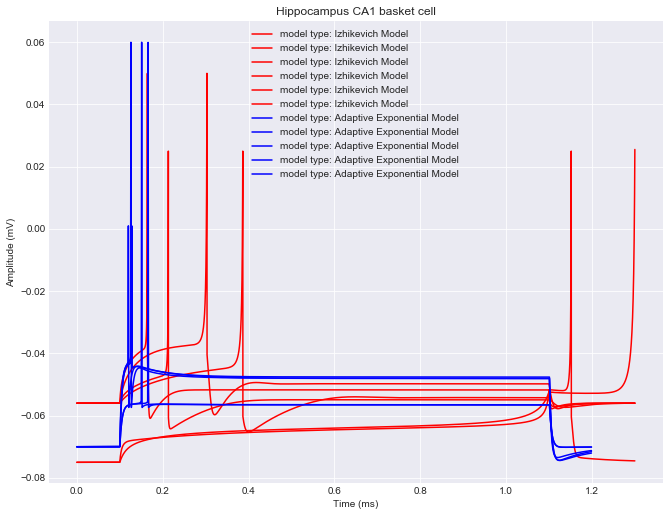

In [38]:
vm = inject_and_plot(RAW_dtc,second_pop=ADEXP_dtc,experimental_cell_type=last_cell_type)

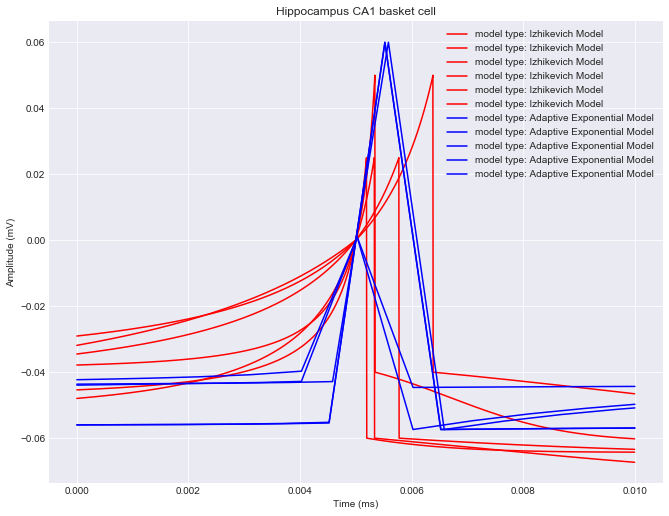

In [39]:
vm = inject_and_plot(RAW_dtc,second_pop=ADEXP_dtc,snippets=True,experimental_cell_type=last_cell_type)

# Thoroughly interrogate Neuron Unit test scores.
by looking into observation/prediction agreement for the two different models classes, in the case of optimizing against one particular experimental cell. In priciple this can easily be done for all of the different experimental cells.

In [141]:
import pandas as pd
from IPython.display import display
import copy
RAW_dtc = {}
ADEXP_dtc = {}
for k in RAW.keys():
    print(k)
    RAW_dtc[k] = copy.copy([d.dtc for d in RAW[k]])
    
    ADEXP_dtc[k] = copy.copy([d.dtc for d in ADEXP[k]])
    df1 = None
    df0 = None
    df1 = pd.DataFrame([RAW_dtc[k][0].scores])
    df1= df1.rename(index={0: str('Izhikivitch')})
    df0 = pd.DataFrame([ADEXP_dtc[k][0].scores])
    df0 = df0.rename(index={0: str('ADEXP')})
    df2 = df0.append(df1)
    df3 = df2.T
    display(df3)
    #df3 = None


Cerebellum Purkinje cell


,ADEXP,Izhikivitch
CapacitanceTest,0.225694,0.052786
InjectedCurrentAPAmplitudeTest,0.011707,0.035871
InjectedCurrentAPThresholdTest,0.053162,0.053127
InjectedCurrentAPWidthTest,0.027397,0.008059
InputResistanceTest,0.123931,1.000000
RestingPotentialTest,0.006060,0.015485
RheobaseTest,1.000000,0.001483
TimeConstantTest,0.048135,0.050954


Olfactory bulb (main) mitral cell


,ADEXP,Izhikivitch
CapacitanceTest,0.225694,0.052786
InjectedCurrentAPAmplitudeTest,0.011707,0.035871
InjectedCurrentAPThresholdTest,0.053162,0.053127
InjectedCurrentAPWidthTest,0.027397,0.008059
InputResistanceTest,0.123931,1.000000
RestingPotentialTest,0.006060,0.015485
RheobaseTest,1.000000,0.001483
TimeConstantTest,0.048135,0.050954


Hippocampus CA1 pyramidal cell


,ADEXP,Izhikivitch
CapacitanceTest,0.225694,0.052786
InjectedCurrentAPAmplitudeTest,0.011707,0.035871
InjectedCurrentAPThresholdTest,0.053162,0.053127
InjectedCurrentAPWidthTest,0.027397,0.008059
InputResistanceTest,0.123931,1.000000
RestingPotentialTest,0.006060,0.015485
RheobaseTest,1.000000,0.001483
TimeConstantTest,0.048135,0.050954


Neocortex pyramidal cell layer 5-6


,ADEXP,Izhikivitch
CapacitanceTest,0.225694,0.052786
InjectedCurrentAPAmplitudeTest,0.011707,0.035871
InjectedCurrentAPThresholdTest,0.053162,0.053127
InjectedCurrentAPWidthTest,0.027397,0.008059
InputResistanceTest,0.123931,1.000000
RestingPotentialTest,0.006060,0.015485
RheobaseTest,1.000000,0.001483
TimeConstantTest,0.048135,0.050954


Hippocampus CA1 basket cell


,ADEXP,Izhikivitch
CapacitanceTest,0.225694,NaN
InjectedCurrentAPAmplitudeTest,0.011707,NaN
InjectedCurrentAPThresholdTest,0.0531622,NaN
InjectedCurrentAPWidthTest,0.0273967,NaN
InputResistanceTest,0.123931,NaN
RestingPotentialTest,0.00605982,NaN
RheobaseTest,1,NaN
TimeConstantTest,0.0481351,NaN
0,NaN,None


In [142]:
for k in RAW.keys():
    print(k)
    RAW_dtc[k] = copy.copy([d.dtc for d in RAW[k]])
    
    ADEXP_dtc[k] = copy.copy([d.dtc for d in ADEXP[k]])
    df1 = None
    df0 = None
    df1 = pd.DataFrame([RAW_dtc[k][0].scores])
    df1= df1.rename(index={0: str('Izhikivitch')})
    df0 = pd.DataFrame([ADEXP_dtc[k][0].scores])
    df0 = df0.rename(index={0: str('ADEXP')})
    df2 = df0.append(df1)
    df3 = df2.T
    display(df3)
    break

Cerebellum Purkinje cell


,ADEXP,Izhikivitch
CapacitanceTest,0.225694,0.052786
InjectedCurrentAPAmplitudeTest,0.011707,0.035871
InjectedCurrentAPThresholdTest,0.053162,0.053127
InjectedCurrentAPWidthTest,0.027397,0.008059
InputResistanceTest,0.123931,1.000000
RestingPotentialTest,0.006060,0.015485
RheobaseTest,1.000000,0.001483
TimeConstantTest,0.048135,0.050954


In the cell above it looks like the adaptive expontial model struggles to recaptiluate an experimental value of a rheobase test current injection, but does well enough on most other tests. It even outperforms the izhikitch model on Injected Amplitude accuracy, Input resistance accuracy, Resting potenial accuracy, and the time constant test.

The izhikevitch model has a different strength weekness profile. The izhikitch model is unable to recapitulate  experimental data for the input resistance test, but it does well better than the adaptive expontial model at matching the experimental capacitance, and matching the experimental width to name a few scores. The adaptive exponential model is able to do well at matching experimental rheobase values.

In [143]:
RAW_dtc = RAW_dtc[k]
ADEXP_dtc = ADEXP_dtc[k]

In [144]:
compare0 = {t.name:t.observation for t in RAW_dtc[0].tests }
compare0 = {k:(v,RAW_dtc[0].predictions[k]) for k,v in compare0.items() }

In [145]:
compare1 = {t.name:t.observation for t in ADEXP_dtc[0].tests }
compare1 = {k:(v,RAW_dtc[0].predictions[k]) for k,v in compare1.items() }

In [146]:
pre_df = {}
def format_nice_frame(compare0):
    for k,v in compare0.items():
        temp = v[0][list(v[0].keys())[0]].rescale(v[1][list(v[1].keys())[0]].units)
        pre_df[k] = (temp,v[1][list(v[1].keys())[0]],v[0]['std'].rescale(v[1][list(v[1].keys())[0]].units))
        df6=pd.DataFrame([pre_df])    

    return df6  
df6 = format_nice_frame(compare0)

# compare observations and predictions:

In [147]:
df7 = format_nice_frame(compare1)#compare1
df7.T

,0
CapacitanceTest,"(1.7100000000000004e-11 s**4*A**2/(kg*m**2), 1..."
InjectedCurrentAPAmplitudeTest,"(0.07702800000000001 V, 0.025065258421045285 V..."
InjectedCurrentAPThresholdTest,"(-49.019999999999996 mV, -0.02426894132413728 ..."
InjectedCurrentAPWidthTest,"(0.00066 s, 0.00076 s, 0.0005602255943601558 s)"
InputResistanceTest,"(25630000.0 kg*m**2/(s**3*A**2), 7176641082.72..."
RestingPotentialTest,"(-0.079 V, -0.056 V, 0.028746585311335674 V)"
RheobaseTest,"(0.04 pA, 0.038884732413180245 pA, 364.3693541..."
TimeConstantTest,"(0.0205 s, 0.0008492994382773672 s, 0.01925354..."


In [148]:
df6.T

,0
CapacitanceTest,"(1.7100000000000004e-11 s**4*A**2/(kg*m**2), 1..."
InjectedCurrentAPAmplitudeTest,"(0.07702800000000001 V, 0.025065258421045285 V..."
InjectedCurrentAPThresholdTest,"(-49.019999999999996 mV, -0.02426894132413728 ..."
InjectedCurrentAPWidthTest,"(0.00066 s, 0.00076 s, 0.0005602255943601558 s)"
InputResistanceTest,"(25630000.0 kg*m**2/(s**3*A**2), 7176641082.72..."
RestingPotentialTest,"(-0.079 V, -0.056 V, 0.028746585311335674 V)"
RheobaseTest,"(0.04 pA, 0.038884732413180245 pA, 364.3693541..."
TimeConstantTest,"(0.0205 s, 0.0008492994382773672 s, 0.01925354..."


# Look at where the optimized cells reside in druckman feature space

In [149]:
RAW_dtc[0].attrs.pop('Iext',None)
attrsf0=pd.DataFrame([RAW_dtc[0].attrs])
attrsf0

,C,a,b,c,d,dt,k,vPeak,vr,vt
0,200,0.01,15,-60,150,0.005,1.6,25,-56,-50


In [68]:
RAW_dtc[-1].attrs.pop('Iext',None)
attrsf1=pd.DataFrame([RAW_dtc[-1].attrs])
attrsf1

,C,a,b,c,d,dt,k,vPeak,vr,vt
0,50,0.03,15,-40,150,0.005,1.6,50,-56,-40


# In notebook cells below we compute Druckman and Allen SDK
Features on the optimized cells, in order to see if the optimized cells fall into pre-defined clusters, differentally  associated with experimental data, and model output data.

To say this another way, it has previously been observed that experimental cell data, and model data, falls into easily seperated categories in feature space. This probably reflects deficits in simple model realism.

By using optimized cells as new data points, and plotting their positions in a reduced dimension feature space we will be able to see if optimized models, are more convincing imitations of experimental data, by testing if new data points are harder to seperate from the experimental data.
### Get Druckman features using a parallel algorithm to save time

In [150]:
import dask.bag as db
bagged = db.from_sequence(RAW_dtc)
druckman_feature_coordinates_izhi = list(bagged.map(nuunit_dm_evaluation).compute())
izhidfeatures = [d.dm_test_features for d in druckman_feature_coordinates_izhi ]


In [151]:
druck0 = pd.DataFrame([izhidfeatures[0]])
druck0 = druck0.rename(index={0: str('Izhikivitch')})


In [152]:
import dask.bag as db
bagged = db.from_sequence(ADEXP_dtc)
druckman_feature_coordinatesadexp = list(bagged.map(nuunit_dm_evaluation).compute())
dfeatures = [d.dm_test_features for d in druckman_feature_coordinatesadexp ]
druck1 = pd.DataFrame([dfeatures[0]])

#TODO: Get Allen features with a serial algorithm.
TODO: This could easily be done in parallel too, by appropriating the code idiom used in the Druckman case.

using a parallel algorithm to save time

In [153]:
RAW_dtc = [d.dtc for d in RAW[k]]

from neuronunit.optimisation.optimization_management import just_allen_predictions
RAW_dtc = [d.dtc for d in RAW[k]]
RAW_dtc[0].protocols[1].keys()

RAW_dtc[0].ampl = RAW_dtc[0].protocols[1]['injected_square_current']['amplitude']*1.5
RAW_dtc[0].ampl
#for i in RAW_dtc:
    
def cell_to_allen(dtc):    
    dtc.pre_obs = None
    dtc.ampl = dtc.protocols[1]['injected_square_current']['amplitude']*4.5
    dtc = just_allen_predictions(dtc)
    return dtc
bagged = db.from_sequence(RAW_dtc)
RAW_dtc = list(bagged.map(cell_to_allen).compute())
#print(RAW_dtc
    #i.preds

In [154]:
preds = [i for i in RAW_dtc[0].preds]
preds
RAW_dtc[1][2]

In [115]:
preds = [i for i in RAW_dtc[1][0].preds]
allen_df = pd.DataFrame(preds)
allen_df

,0
0,adapt
1,latency
2,isi_cv
3,mean_isi
4,median_isi
5,first_isi
6,avg_rate
7,threshold_index
8,clipped
9,threshold_t


In [74]:
druck1
druck1 = druck1.rename(index={0: str('ADEXP')})


In [75]:
druck4 = pd.DataFrame([izhidfeatures[-1]])
druck4 = druck4.rename(index={0: str('Izhi_last')})

In [76]:
druck3 = pd.DataFrame([dfeatures[-1]])
druck3 = druck3.rename(index={0: str('ADEXP_last')})
#druck3.T

In [77]:
druck2 = druck1
druck2 = druck2.append(druck0)
druck2 = druck2.append(druck3)
druck2 = druck2.append(druck4)

In [78]:
#results['Cerebellum Purkinje cell_RAW'] 
cwd = os.getcwd()
import numpy as np
# Open the 1.5x rheobase file
filename = os.path.join(cwd,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df = pickle.load(f)
    
df.iloc[0][192:195]


ISIMedianTest_1.5x                   1.023500e+01
InitialAccommodationMeanTest_1.5x    3.600000e+03
InputResistanceTest_1.5x             9.773438e-14
Name: 313861539, dtype: float64

In [79]:
import numpy as np
# A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
druck2 = druck2.fillna(0).applymap(f)
#d2 = druck2.fillna(0).applymap(f)


#druck2.T
druck2

for col in druck2.columns:
    for dm in df.columns:
        if col in dm:
            #print(col,dm)
            #col = dm
            druck2.rename(columns={col:dm},inplace=True)


## Use Random Forests, variance Explained.
## Then Throw Away Feature Dimensions
Throw that maximally seperate experimental cells, and models. This is done by using random forests to find features that explain the most variance.

The reason for this, is for each dimension we through away helps us deduce if that variance explained by that feature difference was crucial for seperating experimental data from models. In other words, we can identify weaker aspects  of models, and better target improvement areas of model performance.

Previous work has suggested models fail to mimic experimental cells in all the mannerisms pertaininig to features deleted in this data frame below.

In [91]:

# in order to find out what is seperating and what is not.

try:
    del df['InputResistanceTest_1.5x']
    del df['InputResistanceTest_3.0x']

    del df['ohmic_input_resistance_1.5x']
    del df['ohmic_input_resistance_3.0x']
    del df['time_1.5x']                              
    #       0.190362
    del df['decay_time_constant_after_stim_3.0x']
    del df['voltage_deflection_3.0x']
    del df['steady_state_hyper_3.0x']
    del df['steady_state_voltage_stimend_3.0x']
    del df['voltage_deflection_vb_ssse_3.0x']
    del df['sag_amplitude_3.0x']
    #0.198310
    del df['is_not_stuck_1.5x']
except:
    print('features allready deleted.')


# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
df = df.fillna(0).applymap(f)


features allready deleted.


In [92]:
df = df.append(druck2)
df.columns
df
list_cols=[]
for col in df.columns:
    for j in druck2.columns:
        if j in col:
            for i in range(0,len(druck2)):

                #df.append(pd.Series(), ignore_index=True)

                df.ix[len(df)-1, col] = druck2.ix[i,j]
                #print(df.ix[-1, col])
                #print(col)
                list_cols.append(col)
for col in list_cols:                
    print(df.ix[-1,col])            
df

1.7320508075688772
1.7320508075688772
1.7320508075688772
1.7320508075688772
-1.7320508075688772
-1.7320508075688772
-1.7320508075688772
-1.7320508075688772
1.7320508075688774
1.7320508075688774
1.7320508075688774
1.7320508075688774
1.7320508075688774
1.7320508075688774
1.7320508075688774
1.7320508075688774
-1.7320508075688774
-1.7320508075688774
-1.7320508075688774
-1.7320508075688774
-1.2380423296522078
-1.2380423296522078
-1.2380423296522078
-1.2380423296522078
1.371322092770454
1.371322092770454
1.371322092770454
1.371322092770454
-0.5436602063152486
-0.5436602063152486
-0.5436602063152486
-0.5436602063152486
-0.5271517179863878
-0.5271517179863878
-0.5271517179863878
-0.5271517179863878
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8282792413583402
0.8282792413583402
0.8282792413583402
0.8282792413583402
0.0
0.0
0.0
0.0
-0.12782148177906383
-0.12782148177906383
-0.12782148177906383
-0.12782148177906383
-0.5767468591930858
-0.5767468591930858
-0.5767468591930858
-0.5767468591930858
-0.572217348

,AP12AHPDepthPercentChangeTest_1.5x,AP12AmplitudeChangePercentTest_1.5x,AP12AmplitudeDropTest_1.5x,AP12HalfWidthChangePercentTest_1.5x,AP12RateOfChangePeakToTroughPercentChangeTest_1.5x,AP1AHPDepthTest_1.5x,AP1AmplitudeTest_1.5x,AP1DelayMeanStrongStimTest_1.5x,AP1DelayMeanTest_1.5x,AP1DelaySDStrongStimTest_1.5x,...,Burst1ISIMeanStrongStimTest_1.5x,Burst1ISIMeanTest_1.5x,Burst1ISISDStrongStimTest_1.5x,Burst1ISISDTest_1.5x,ISIBurstMeanChangeTest_1.5x,ISICVTest_1.5x,ISIMedianTest_1.5x,InitialAccommodationMeanTest_1.5x,SSAccommodationMeanTest_1.5x,SpikeRateStrongStimTest_1.5x
ADEXP,-0.577350,0.577350,-0.577350,-0.577350,0.577350,0.983694,-0.955878,-0.594012,-0.627248,0.0,...,-0.573491,1.207407,0.0,0.0,1.732051,1.732051,0.692939,0.926788,0.0,0.539019
Izhikivitch,-0.577350,0.577350,-0.577350,-0.577350,0.577350,-0.729345,0.540434,1.731685,1.730966,0.0,...,1.731999,-0.987878,0.0,0.0,-0.577350,-0.577350,-1.515632,-0.998706,0.0,-1.142151
ADEXP_last,-0.577350,0.577350,-0.577350,-0.577350,0.577350,0.983694,-0.955878,-0.594012,-0.576566,0.0,...,-0.589669,0.768350,0.0,0.0,-0.577350,-0.577350,-0.253591,1.070624,0.0,1.355859
Izhi_last,1.732051,-1.732051,1.732051,1.732051,-1.732051,-1.238042,1.371322,-0.543660,-0.527152,0.0,...,-0.568840,-0.987878,0.0,0.0,-0.577350,-0.577350,1.076284,-0.998706,0.0,-0.752727
ADEXP,-0.577350,0.577350,-0.577350,-0.577350,0.577350,0.983694,-0.955878,-0.594012,-0.627248,0.0,...,-0.573491,1.207407,0.0,0.0,1.732051,1.732051,0.692939,0.926788,0.0,0.539019
Izhikivitch,-0.577350,0.577350,-0.577350,-0.577350,0.577350,-0.729345,0.540434,1.731685,1.730966,0.0,...,1.731999,-0.987878,0.0,0.0,-0.577350,-0.577350,-1.515632,-0.998706,0.0,-1.142151
ADEXP_last,-0.577350,0.577350,-0.577350,-0.577350,0.577350,0.983694,-0.955878,-0.594012,-0.576566,0.0,...,-0.589669,0.768350,0.0,0.0,-0.577350,-0.577350,-0.253591,1.070624,0.0,1.355859
Izhi_last,1.732051,-1.732051,1.732051,1.732051,-1.732051,-1.238042,1.371322,-0.543660,-0.527152,0.0,...,-0.568840,-0.987878,0.0,0.0,-0.577350,-0.577350,1.076284,-0.998706,0.0,-0.752727


In [93]:
druck2
#print("There are %d models+data and %d features" % df.shape)
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
druck2

,AP12AHPDepthPercentChangeTest_1.5x,AP12AmplitudeChangePercentTest_1.5x,AP12AmplitudeDropTest_1.5x,AP12HalfWidthChangePercentTest_1.5x,AP12RateOfChangePeakToTroughPercentChangeTest_1.5x,AP1AHPDepthTest_1.5x,AP1AmplitudeTest_1.5x,AP1DelayMeanStrongStimTest_1.5x,AP1DelayMeanTest_1.5x,AP1DelaySDStrongStimTest_1.5x,...,Burst1ISIMeanStrongStimTest_1.5x,Burst1ISIMeanTest_1.5x,Burst1ISISDStrongStimTest_1.5x,Burst1ISISDTest_1.5x,ISIBurstMeanChangeTest_1.5x,ISICVTest_1.5x,ISIMedianTest_1.5x,InitialAccommodationMeanTest_1.5x,SSAccommodationMeanTest_1.5x,SpikeRateStrongStimTest_1.5x
ADEXP,-0.577350,0.577350,-0.577350,-0.577350,0.577350,0.983694,-0.955878,-0.594012,-0.627248,0.0,...,-0.573491,1.207407,0.0,0.0,1.732051,1.732051,0.692939,0.926788,0.0,0.539019
Izhikivitch,-0.577350,0.577350,-0.577350,-0.577350,0.577350,-0.729345,0.540434,1.731685,1.730966,0.0,...,1.731999,-0.987878,0.0,0.0,-0.577350,-0.577350,-1.515632,-0.998706,0.0,-1.142151
ADEXP_last,-0.577350,0.577350,-0.577350,-0.577350,0.577350,0.983694,-0.955878,-0.594012,-0.576566,0.0,...,-0.589669,0.768350,0.0,0.0,-0.577350,-0.577350,-0.253591,1.070624,0.0,1.355859
Izhi_last,1.732051,-1.732051,1.732051,1.732051,-1.732051,-1.238042,1.371322,-0.543660,-0.527152,0.0,...,-0.568840,-0.987878,0.0,0.0,-0.577350,-0.577350,1.076284,-0.998706,0.0,-0.752727


In [84]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler#, PCA
ss = StandardScaler()
druck2[:] = ss.fit_transform(druck2.values)
druck2.groupby(druck2.index).first()
druck2 = pd.DataFrame.drop_duplicates(druck2)
print(len(druck2))
df = druck2

#df.fillna(0).applymap(f)

#new_models_idx

4


In [85]:
new_models_idx = list(range(1666,1671,1))
new_models_df = df[df.index.isin(new_models_idx)]
len(new_models_df)
new_models_idx
new_models_df

,AP12AHPDepthPercentChangeTest_1.5x,AP12AmplitudeChangePercentTest_1.5x,AP12AmplitudeDropTest_1.5x,AP12HalfWidthChangePercentTest_1.5x,AP12RateOfChangePeakToTroughPercentChangeTest_1.5x,AP1AHPDepthTest_1.5x,AP1AmplitudeTest_1.5x,AP1DelayMeanStrongStimTest_1.5x,AP1DelayMeanTest_1.5x,AP1DelaySDStrongStimTest_1.5x,...,Burst1ISIMeanTest_1.5x,Burst1ISISDStrongStimTest_1.5x,Burst1ISISDTest_1.5x,ISIBurstMeanChangeTest_1.5x,ISICVTest_1.5x,ISIMedianTest_1.5x,InitialAccommodationMeanTest_1.5x,InputResistanceTest_1.5x,SSAccommodationMeanTest_1.5x,SpikeRateStrongStimTest_1.5x


In [86]:
# Check to see what is there.  Might also check to see if there is data there.
#df_30x#.head()

# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
print(len(experiment_df))


0


In [87]:
#print(len(experiment_df))
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
#experiment_df.index
experiment_df.groupby(experiment_df.index).first()
len(experiment_df)

0

In [88]:
print(len(model_df))
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()

len(model_df)

4


4

ValueError: x and y must have same first dimension, but have shapes (38,) and (4,)

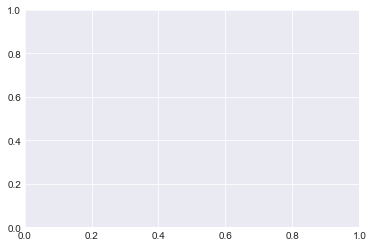

In [89]:
from sklearn.decomposition import PCA

# Do PCA and look at variance explained
pca = PCA()
pca.fit(df.T.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [ ]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)


#model_idx = [idx for idx in enumerate(df.index.values) if type(idx)==str]
'''
#label_model_no_trans_df
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'
'''
# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
model_no_trans_df = df[~df.index.isin(experiment_idx)]
experiment_idx_labels = [(i,idx) for i,idx in enumerate(df.index.values) if type(idx)==int]

#model_df
#df.labels
model_no_trans_df
experiment_idx_labels = [i[0] for i in experiment_idx_labels]
experiment_idx_labels
model_no_trans_df
model_index_labels = ~df.index.isin(experiment_idx)

model_index_labels




In [ ]:
# Do an isomap embedding in 2 dimensions
isomap = Isomap(n_components=2)
isomap.fit(df.values)
iso = isomap.embedding_.T
# Plot that isomap embedding. Each is a model (or a cell, for data)
#plt.scatter(iso);
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')

In [ ]:
standard = 1.5
strong = 3.0
easy_map = [
            {'AP12AmplitudeDropTest':standard},
            {'AP1SSAmplitudeChangeTest':standard},
            {'AP1AmplitudeTest':standard},
            {'AP1WidthHalfHeightTest':standard},
            {'AP1WidthPeakToTroughTest':standard},
            {'AP1RateOfChangePeakToTroughTest':standard},
            {'AP1AHPDepthTest':standard},
            {'AP2AmplitudeTest':standard},
            {'AP2WidthHalfHeightTest':standard},
            {'AP2WidthPeakToTroughTest':standard},
            {'AP2RateOfChangePeakToTroughTest':standard},
            {'AP2AHPDepthTest':standard},
            {'AP12AmplitudeChangePercentTest':standard},
            {'AP12HalfWidthChangePercentTest':standard},
            {'AP12RateOfChangePeakToTroughPercentChangeTest':standard},
            {'AP12AHPDepthPercentChangeTest':standard},
            {'InputResistanceTest':str('ir_currents')},
            {'AP1DelayMeanTest':standard},
            {'AP1DelaySDTest':standard},
            {'AP2DelayMeanTest':standard},
            {'AP2DelaySDTest':standard},
            {'Burst1ISIMeanTest':standard},
            {'Burst1ISISDTest':standard},
            {'InitialAccommodationMeanTest':standard},
            {'SSAccommodationMeanTest':standard},
            {'AccommodationRateToSSTest':standard},
            {'AccommodationAtSSMeanTest':standard},
            {'AccommodationRateMeanAtSSTest':standard},
            {'ISICVTest':standard},
            {'ISIMedianTest':standard},
            {'ISIBurstMeanChangeTest':standard},
            {'SpikeRateStrongStimTest':strong},
            {'AP1DelayMeanStrongStimTest':strong},
            {'AP1DelaySDStrongStimTest':strong},
            {'AP2DelayMeanStrongStimTest':strong},
            {'AP2DelaySDStrongStimTest':strong},
            {'Burst1ISIMeanStrongStimTest':strong},
            {'Burst1ISISDStrongStimTest':strong},
        ]

dm_labels = [list(keys.keys())[0]+str('_')+str(list(keys.values())[0])+str('x') for keys in easy_map ]
#dm_labels['AHP_depth_abs_slow_1.5x']

#dir()

In [ ]:

druck2.columns        
#df.append(druck2)
druck2
#df.columns

In [ ]:
druck2.columns
df.append(druck2)
df['AP12AmplitudeDropTest_1.5x']
druck2['AP12AmplitudeDropTest_1.5x']

### df['AP12AmplitudeDropTest_1.5x']